# Task 10 : Benchmark Top ML Algorithms

This task tests your ability to use different ML algorithms when solving a specific problem.


### Dataset
Predict Loan Eligibility for Dream Housing Finance company

Dream Housing Finance company deals in all kinds of home loans. They have presence across all urban, semi urban and rural areas. Customer first applies for home loan and after that company validates the customer eligibility for loan.

Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have provided a dataset to identify the customers segments that are eligible for loan amount so that they can specifically target these customers.

Train: https://raw.githubusercontent.com/subashgandyer/datasets/main/loan_train.csv

Test: https://raw.githubusercontent.com/subashgandyer/datasets/main/loan_test.csv

## Task Requirements
### You can have the following Classification models built using different ML algorithms
- Decision Tree
- KNN
- Logistic Regression
- SVM
- Random Forest
- Any other algorithm of your choice

### Use GridSearchCV for finding the best model with the best hyperparameters

- ### Build models
- ### Create Parameter Grid
- ### Run GridSearchCV
- ### Choose the best model with the best hyperparameter
- ### Give the best accuracy
- ### Also, benchmark the best accuracy that you could get for every classification algorithm asked above

#### Your final output will be something like this:
- Best algorithm accuracy
- Best hyperparameter accuracy for every algorithm

**Table 1 (Algorithm wise best model with best hyperparameter)**

Algorithm   |     Accuracy   |   Hyperparameters
- DT
- KNN
- LR
- SVM
- RF
- anyother

**Table 2 (Best overall)**

Algorithm    |   Accuracy    |   Hyperparameters



### Submission
- Submit Notebook containing all saved ran code with outputs
- Document with the above two tables

In [7]:
# importing libraries
import pandas as pd
import scipy
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
# passing parameter to the function
df = pd.read_csv(" https://raw.githubusercontent.com/subashgandyer/datasets/main/loan_train.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [13]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [21]:
df.describe

<bound method NDFrame.describe of       Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001002    Male      No          0      Graduate            No   
1    LP001003    Male     Yes          1      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
3    LP001006    Male     Yes          0  Not Graduate            No   
4    LP001008    Male      No          0      Graduate            No   
..        ...     ...     ...        ...           ...           ...   
609  LP002978  Female      No          0      Graduate            No   
610  LP002979    Male     Yes         3+      Graduate            No   
611  LP002983    Male     Yes          1      Graduate            No   
612  LP002984    Male     Yes          2      Graduate            No   
613  LP002990  Female      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849        

In [19]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [40]:
# Check data types of features
numeric_cols = df.select_dtypes(include=['number']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

print("\nNumeric Columns:", numeric_cols)
print("Categorical Columns:", categorical_cols)


Numeric Columns: ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']
Categorical Columns: ['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']


In [42]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
# Encode categorical variables
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Check data types of features
numeric_cols = df.select_dtypes(include=['number']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

print("\nNumeric Columns:", numeric_cols)
print("Categorical Columns:", categorical_cols)


Numeric Columns: ['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status']
Categorical Columns: []


In [44]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,0,0,5849,0.0,NaN,360.0,1.0,2,1
1,1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1


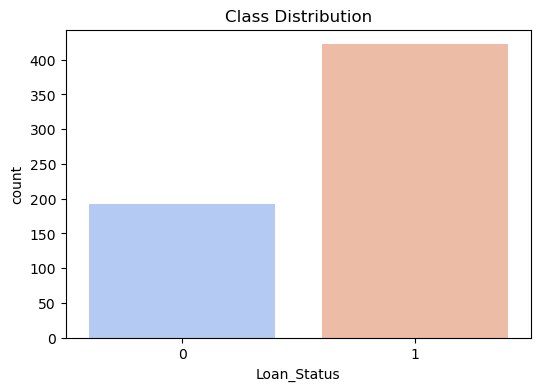

In [52]:
# Visualize class distribution
target_col = "Loan_Status"
plt.figure(figsize=(6,4))
sns.countplot(data=df, x=target_col, hue=target_col, palette='coolwarm', legend=False)
plt.title('Class Distribution')
plt.show()


<Figure size 2000x3000 with 0 Axes>

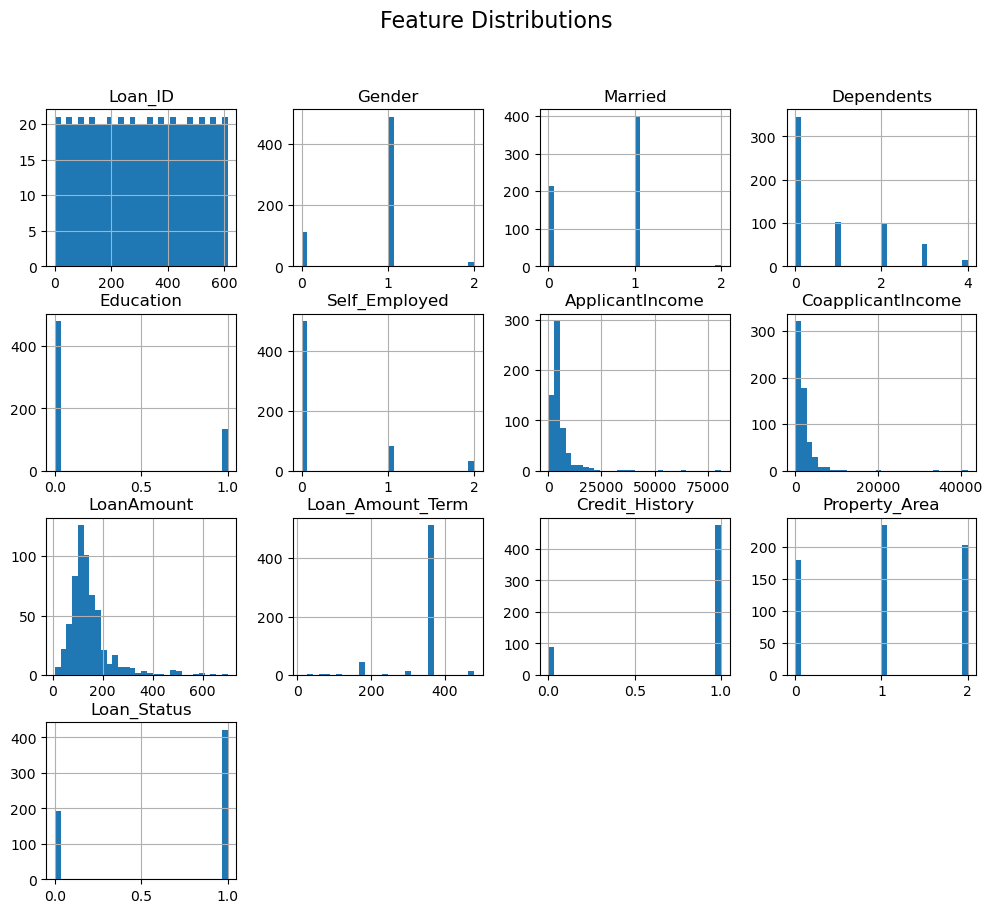

In [54]:
# Feature distributions
plt.figure(figsize=(20, 30))
df.hist(figsize=(12, 10), bins=30)
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()

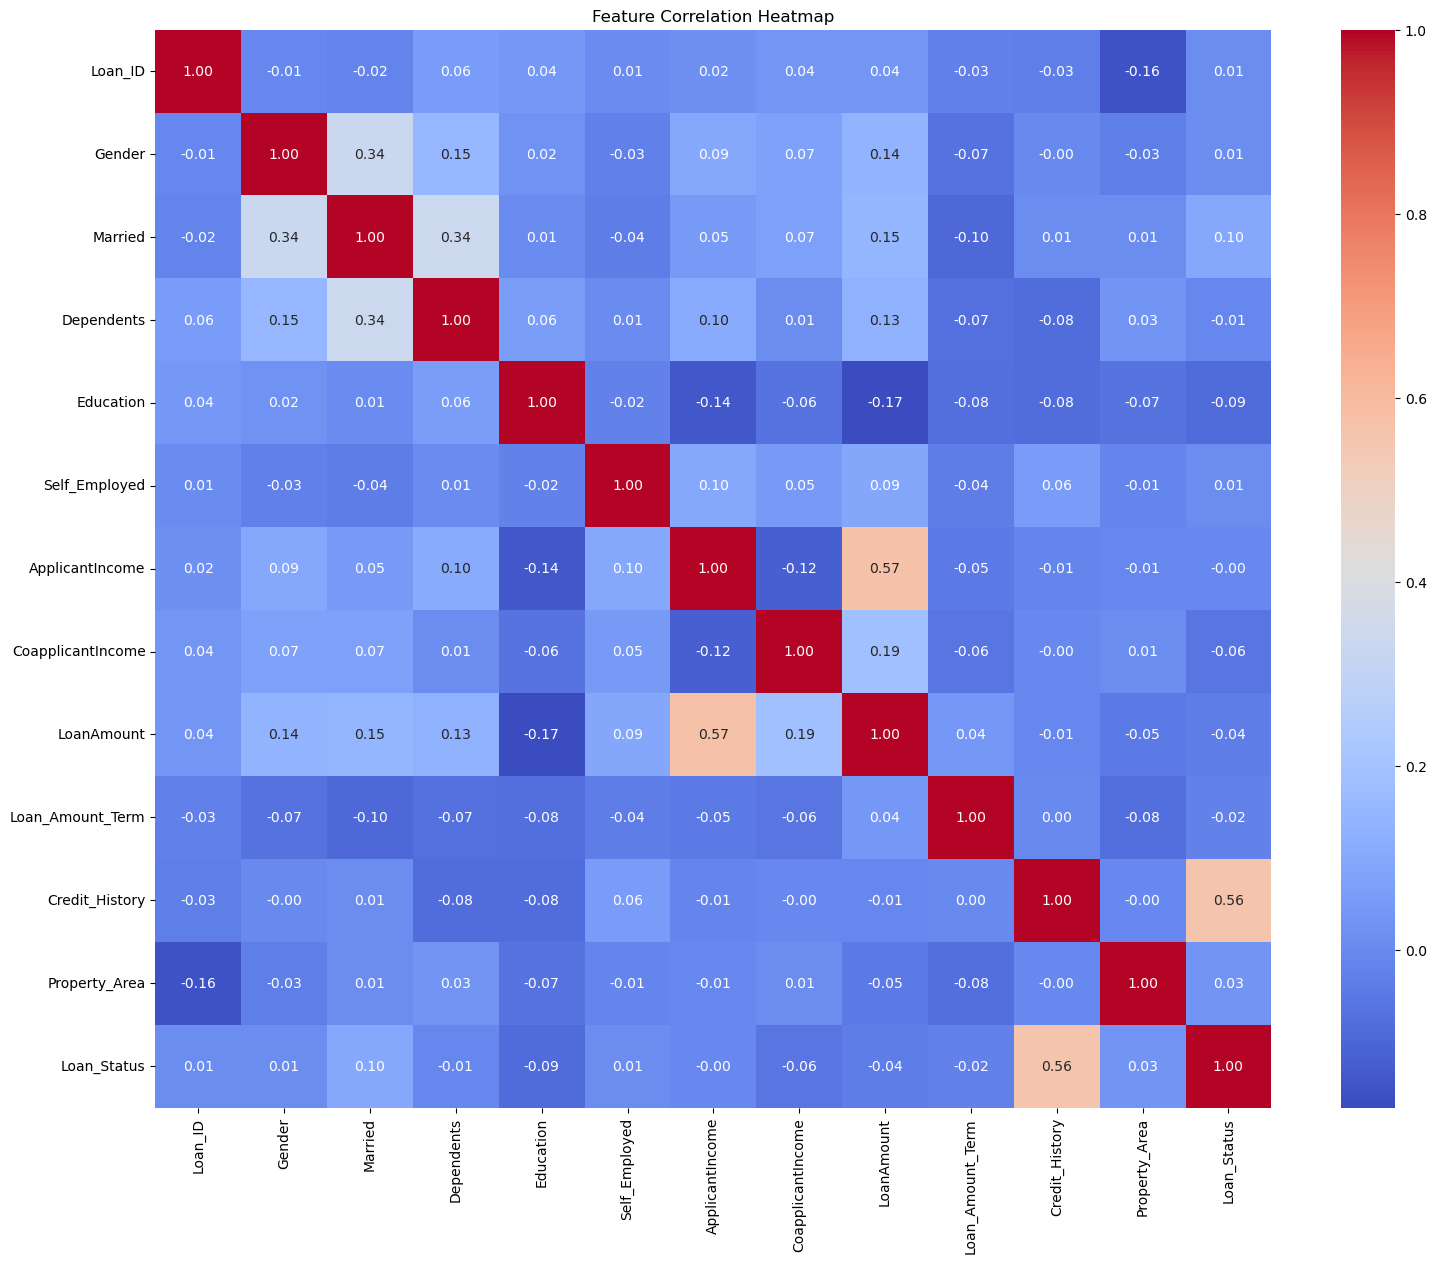

In [56]:
# Correlation heatmap
plt.figure(figsize=(18, 14))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Feature Correlation Heatmap")
plt.show()

## Fill Null Values with Median (fillna)

In [46]:
# Method 1: Fill with mode
df_filled = df.copy()
df_filled.fillna(df_filled.mode().iloc[0], inplace=True)
df_filled.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

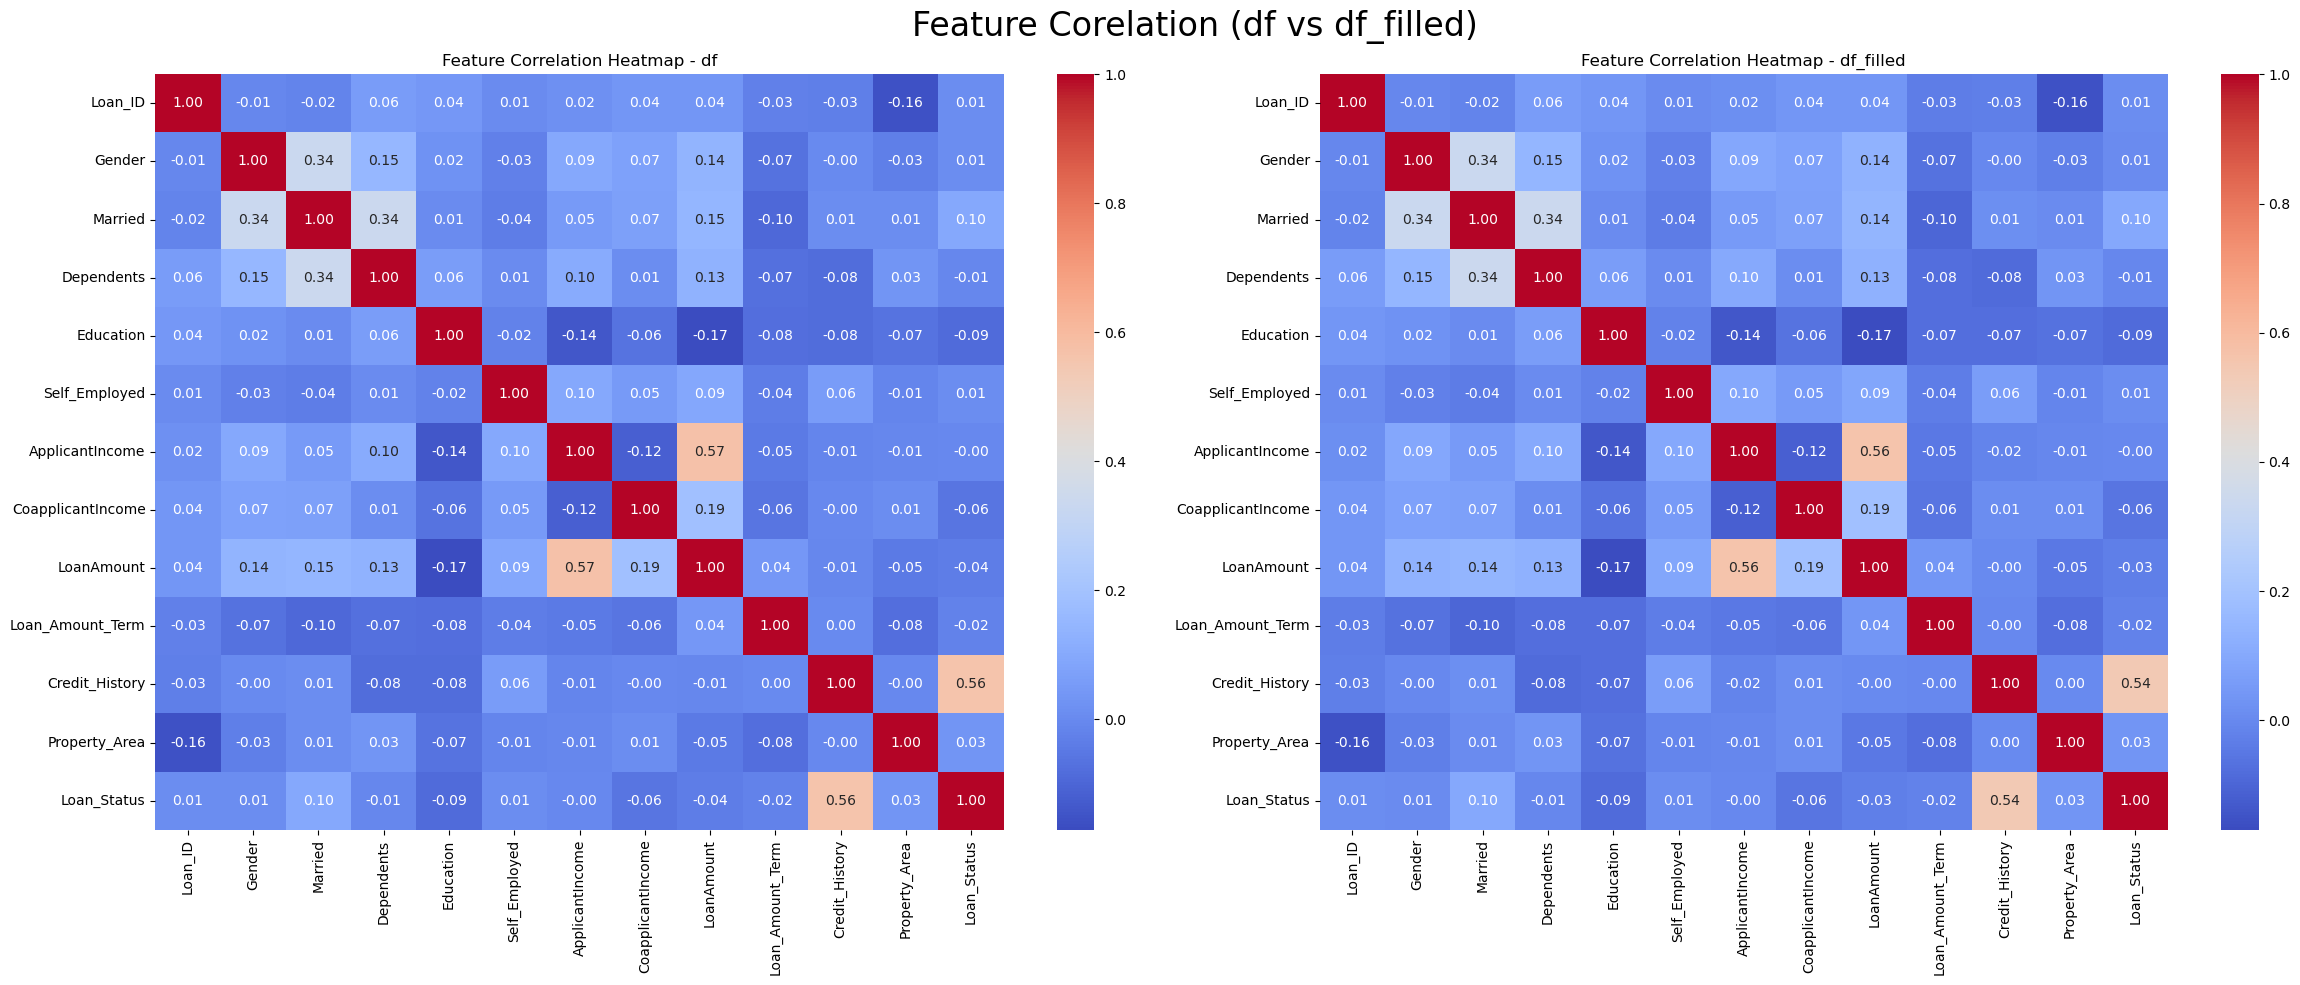

In [70]:
# Create a figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(24, 10))

# Heatmap for df
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f', ax=axes[0])
axes[0].set_title("Feature Correlation Heatmap - df")

# Heatmap for df_filled
sns.heatmap(df_filled.corr(), annot=True, cmap='coolwarm', fmt='.2f', ax=axes[1])
axes[1].set_title("Feature Correlation Heatmap - df_filled")

plt.suptitle("Feature Corelation (df vs df_filled)", fontsize=24)
plt.tight_layout()
plt.show()


## Fill Null Values Simple Imputer (Mode)

In [48]:
# Method 2: Simple Imputer (Mode)
from sklearn.impute import SimpleImputer, KNNImputer
df_simple_imputer = df.copy()
simple_imputer = SimpleImputer(strategy='most_frequent')
df_simple_imputer.iloc[:, :] = simple_imputer.fit_transform(df_simple_imputer)
df_simple_imputer.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

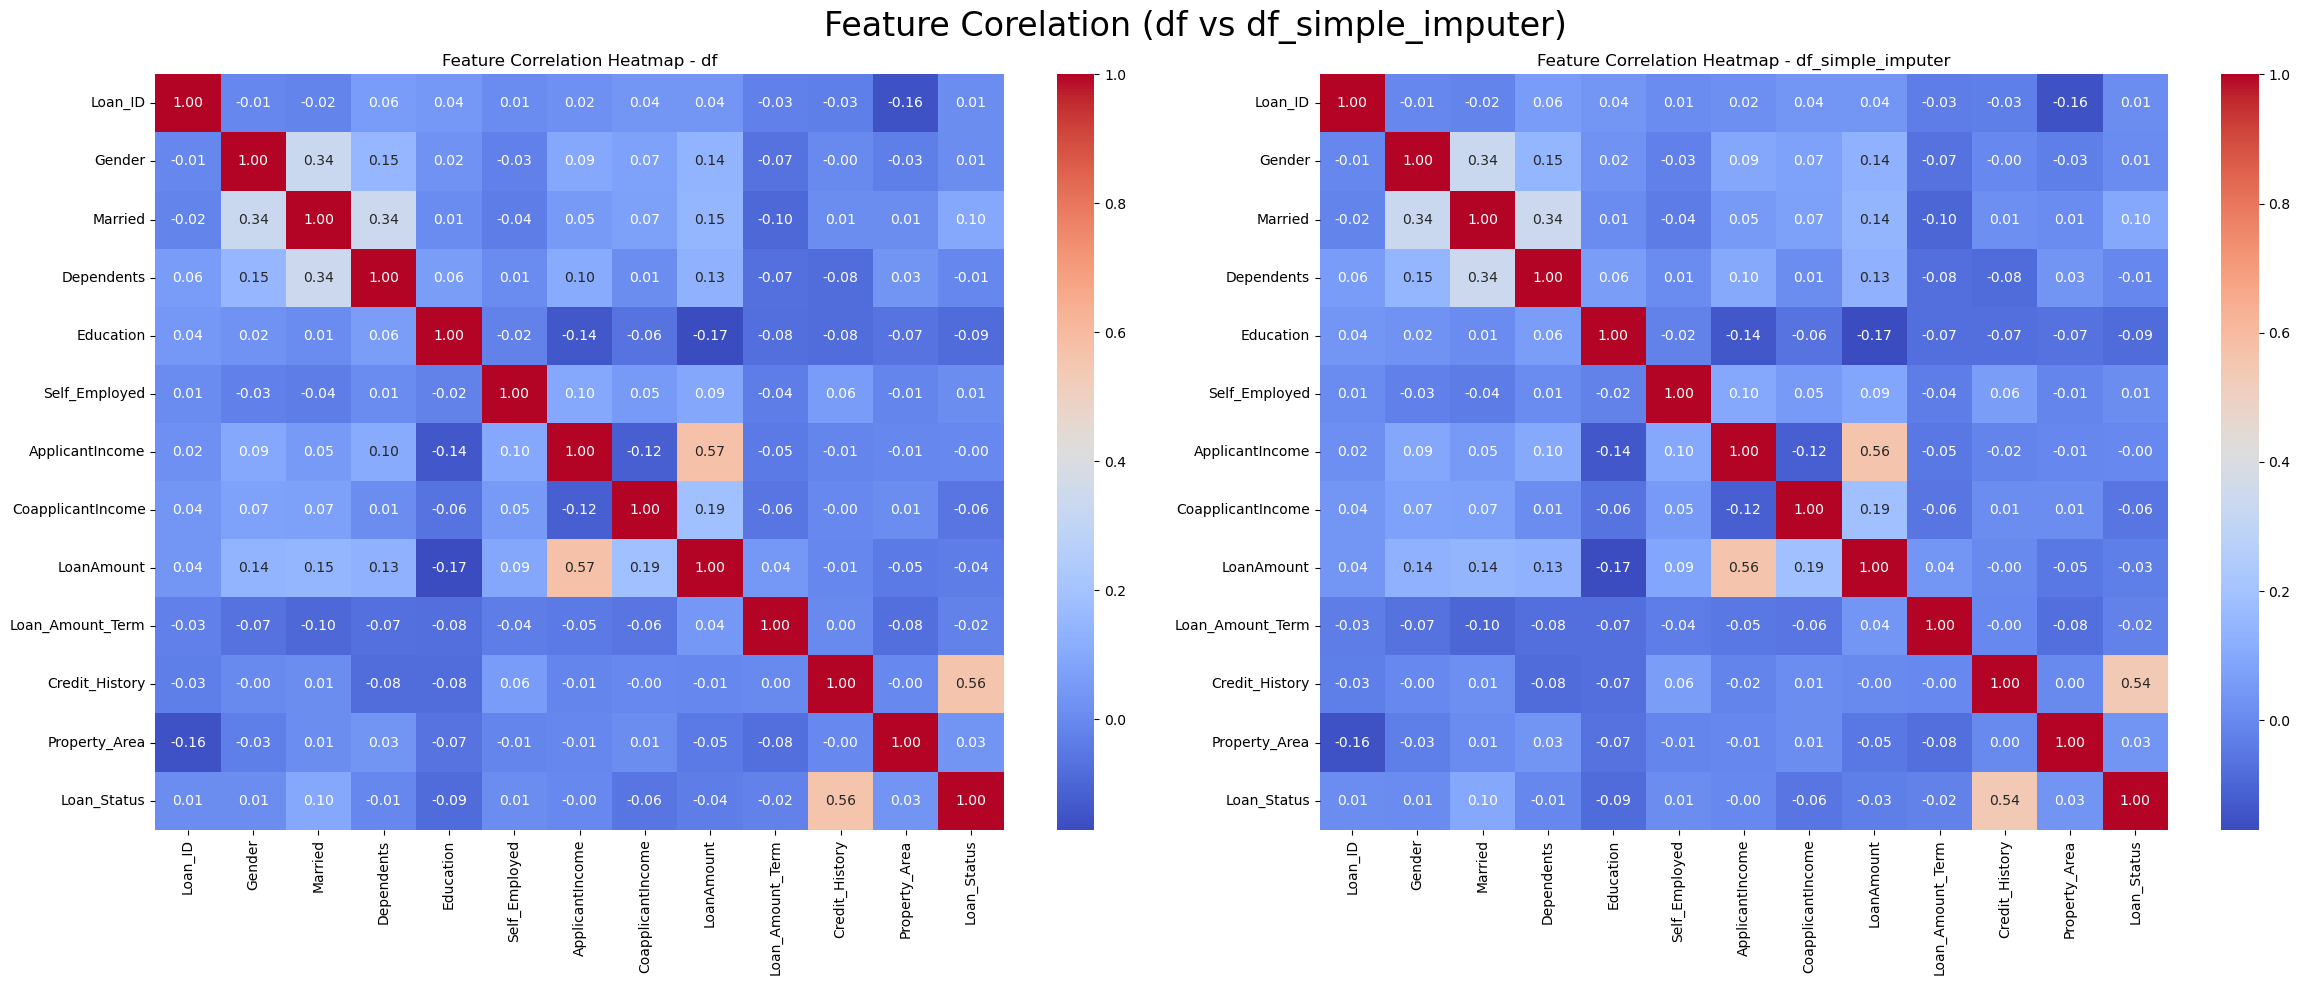

In [72]:
# Create a figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(24, 10))

# Heatmap for df
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f', ax=axes[0])
axes[0].set_title("Feature Correlation Heatmap - df")

# Heatmap for df_filled
sns.heatmap(df_simple_imputer.corr(), annot=True, cmap='coolwarm', fmt='.2f', ax=axes[1])
axes[1].set_title("Feature Correlation Heatmap - df_simple_imputer")

plt.suptitle("Feature Corelation (df vs df_simple_imputer)", fontsize=24)
plt.tight_layout()
plt.show()

## Fill Null Values with Multivariate Imputer (KNN Imputer)

In [50]:
# Method 3: Multivariate Imputer (KNN Imputer)
df_multi_imputer = df.copy()
knn_imputer = KNNImputer(n_neighbors=5)
df_multi_imputer.iloc[:, :] = knn_imputer.fit_transform(df_multi_imputer)
df_multi_imputer.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

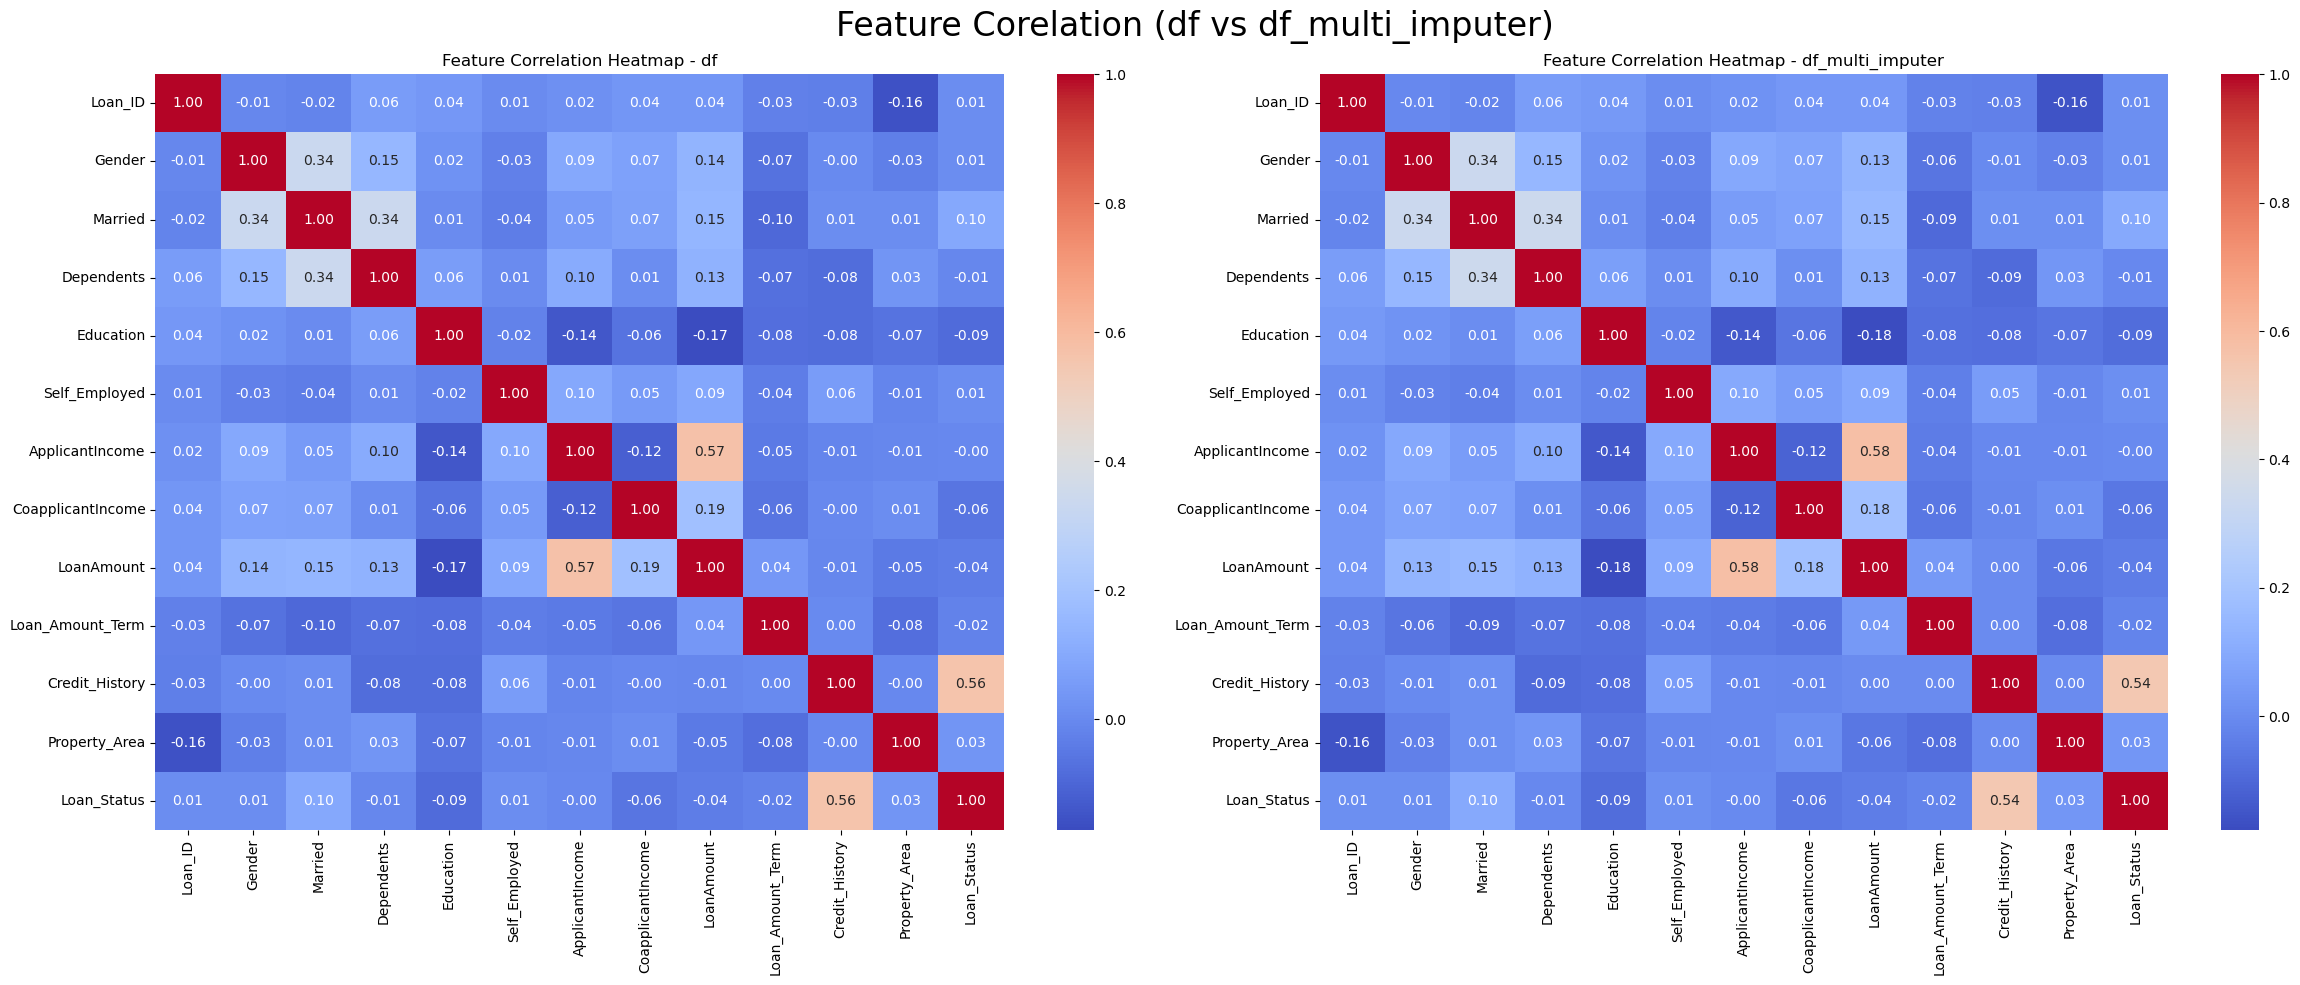

In [74]:
# Create a figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(24, 10))

# Heatmap for df
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f', ax=axes[0])
axes[0].set_title("Feature Correlation Heatmap - df")

# Heatmap for df_multi_imputer
sns.heatmap(df_multi_imputer.corr(), annot=True, cmap='coolwarm', fmt='.2f', ax=axes[1])
axes[1].set_title("Feature Correlation Heatmap - df_multi_imputer")

plt.suptitle("Feature Corelation (df vs df_multi_imputer)", fontsize=24)
plt.tight_layout()
plt.show()